# Norway Dev Salaries

In [39]:
%pip install numpy pandas matplotlib seaborn scipy

Note: you may need to restart the kernel to use updated packages.


#### Traduction des colonnes

expérience -> erfaring

salaires ->lønn

Text(0.5, 0, 'expérience')

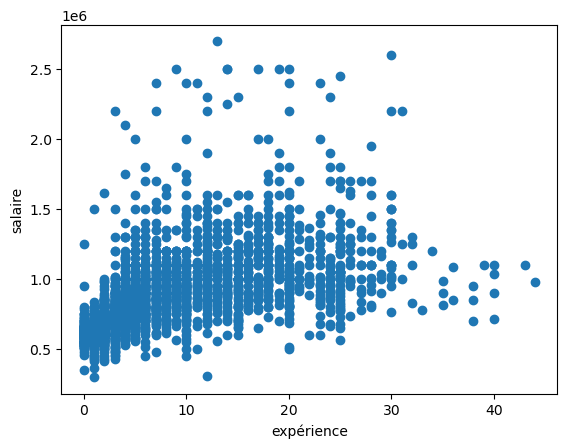

In [40]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import pearsonr, linregress
import matplotlib.pyplot as plt
import seaborn as sns

cash = pd.read_csv("salaries.csv")

df = cash.select_dtypes(include=[np.number, np.float64])

plt.scatter(df['erfaring'], df['lønn'])
plt.ylabel("salaire")
plt.xlabel("expérience")

In [41]:
stats = df.describe()
stats.loc['median'] = df.median()
print(stats)

          utdanning     erfaring          lønn
count   2682.000000  2682.000000  2.682000e+03
mean       4.127517     8.568606  8.980438e+05
std        2.842134     7.770099  2.882830e+05
min        0.000000     0.000000  3.000000e+05
25%        3.000000     3.000000  7.000000e+05
50%        3.000000     6.000000  8.500000e+05
75%        5.000000    13.000000  1.020000e+06
max       20.000000    44.000000  2.700000e+06
median     3.000000     6.000000  8.500000e+05


In [42]:
print(
    pd.DataFrame(
        pearsonr(
            df['erfaring'], df['lønn']
        ),
        index=["pearson-coef", "p-value"],
        columns=["resultat_test"],
    )
)

              resultat_test
pearson-coef   5.449434e-01
p-value       2.521170e-207


### soit H0 l'hypothèse nulle tel que H0:"Les deux variables sont dépendantes". Le risque est de 5%.
### p-value = 2.521170e-207, ce qui est plus grand que 5% , et le pearson-coef est de 5.449434e-01, ce qui signifie qu'il n'y a pas de corélation entre les deux variables. ainsi, on rejette l'hypotèse H0, les deux variables sont indépendantes

Slope :  20218.267894702218 
Intercept :  724801.4464995705


Text(0.5, 0, 'expérience')

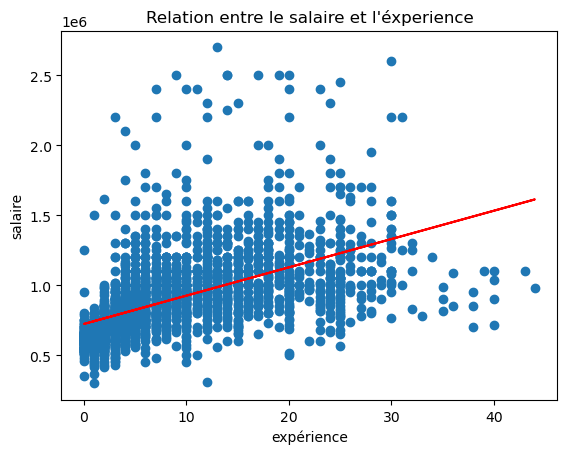

In [43]:
from scipy.stats import linregress
slope, intercept, r_valuen, p_value, std_err = linregress(
    df['erfaring'], df['lønn']
)
print("Slope : ", slope, "\nIntercept : ", intercept)

plt.scatter(df['erfaring'], df['lønn'])

def Prediction(x):
    return slope * x + intercept

fitline = Prediction(df['erfaring'])

plt.plot(
    df['erfaring'],
    fitline,
    color="red",    
    label="Modèle de régression",
)
plt.title("Relation entre le salaire et l'éxperience")
plt.ylabel("salaire")
plt.xlabel("expérience")

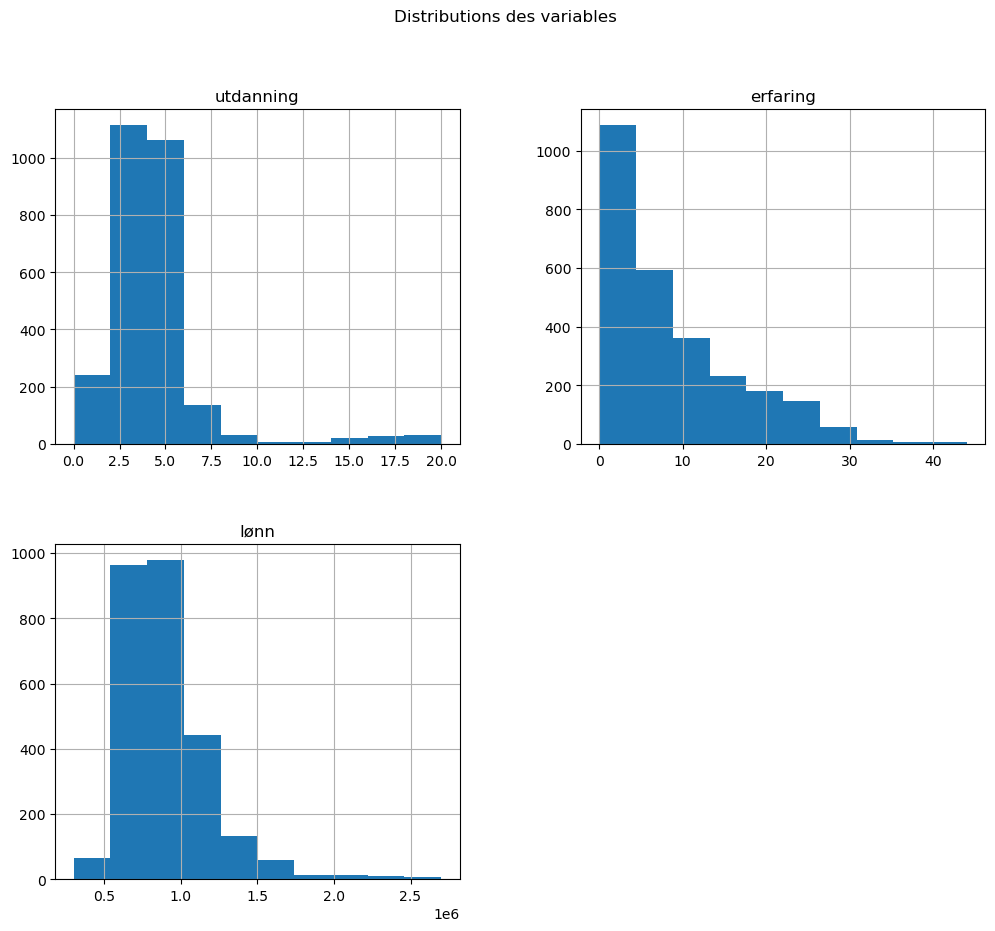

In [44]:
df.hist(figsize=(12, 10))
plt.suptitle("Distributions des variables")
plt.show()

## Nous allons maintenant enlever les outliers

      utdanning  erfaring     lønn     lønn Pred        EcartAB
1910          5         2   765000  7.652380e+05     237.982289
596           4         2   765000  7.652380e+05     237.982289
597           5         2   765000  7.652380e+05     237.982289
1263          3         2   765000  7.652380e+05     237.982289
1125          0        25  1230000  1.230258e+06     258.143867
...         ...       ...      ...           ...            ...
728           5        40  1100000  1.533532e+06  433532.162288
2464         16        20   690000  1.129167e+06  439166.804394
944          10        25   790000  1.230258e+06  440258.143867
2318          5        35   990000  1.432441e+06  442440.822814
210           3         9  1350000  9.067659e+05  443234.142448

[2532 rows x 5 columns]


Text(0.5, 0, 'expérience')

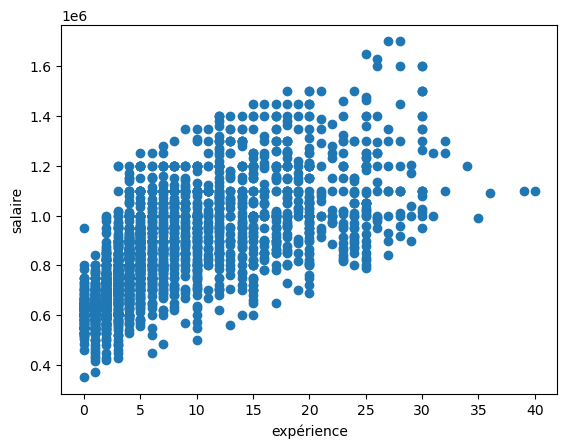

In [45]:
dfWithoutError = pd.DataFrame(df)
dfWithoutError["lønn Pred"] = Prediction(dfWithoutError['erfaring'])

dfWithoutError['EcartAB'] = abs(dfWithoutError['lønn'] - dfWithoutError["lønn Pred"])

dfWithoutError = dfWithoutError.sort_values(by='EcartAB', ascending=True)
dfWithoutError = dfWithoutError.drop(dfWithoutError["EcartAB"].tail(150).index)
print(dfWithoutError)
plt.scatter(dfWithoutError['erfaring'], dfWithoutError['lønn'])
plt.ylabel("salaire")
plt.xlabel("expérience")

In [46]:
statsb = dfWithoutError.describe()
statsb.loc['median'] = dfWithoutError.median()
print(stats)

          utdanning     erfaring          lønn
count   2682.000000  2682.000000  2.682000e+03
mean       4.127517     8.568606  8.980438e+05
std        2.842134     7.770099  2.882830e+05
min        0.000000     0.000000  3.000000e+05
25%        3.000000     3.000000  7.000000e+05
50%        3.000000     6.000000  8.500000e+05
75%        5.000000    13.000000  1.020000e+06
max       20.000000    44.000000  2.700000e+06
median     3.000000     6.000000  8.500000e+05


In [47]:
print(
    pd.DataFrame(
        pearsonr(
            dfWithoutError['erfaring'], dfWithoutError['lønn']
        ),
        index=["pearson-coef", "p-value"],
        columns=["resultat_test"],
    )
)

              resultat_test
pearson-coef        0.68452
p-value             0.00000


Slope :  20193.575016352865 
Intercept :  698739.7984159146


Text(0, 0.5, 'Salaire')

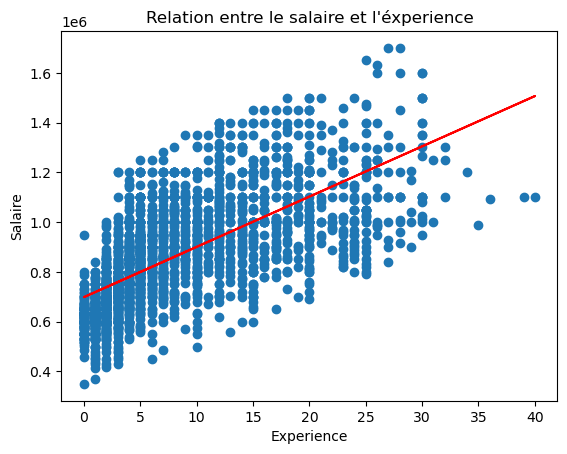

In [48]:
from scipy.stats import linregress
slope, intercept, r_valuen, p_value, std_err = linregress(
    dfWithoutError['erfaring'], dfWithoutError['lønn']
)
print("Slope : ", slope, "\nIntercept : ", intercept)

plt.scatter(dfWithoutError['erfaring'], dfWithoutError['lønn'])

def Prediction(x):
    return slope * x + intercept

fitline = Prediction(dfWithoutError['erfaring'])

plt.plot(
    dfWithoutError['erfaring'],
    fitline,
    color="red",    
    label="Modèle de régression",
)
plt.title("Relation entre le salaire et l'éxperience")
plt.xlabel("Experience")
plt.ylabel("Salaire")

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(dfWithoutError['erfaring'], fitline)
mse = mean_squared_error(dfWithoutError['erfaring'], fitline)
rmse = np.sqrt(mse)
print(f"MAE : {mae}")
print(f"MSE : {mse}")
print(f"RMSE : {rmse}")

MAE : 862553.259478673
MSE : 766043292165.7755
RMSE : 875238.9914564909


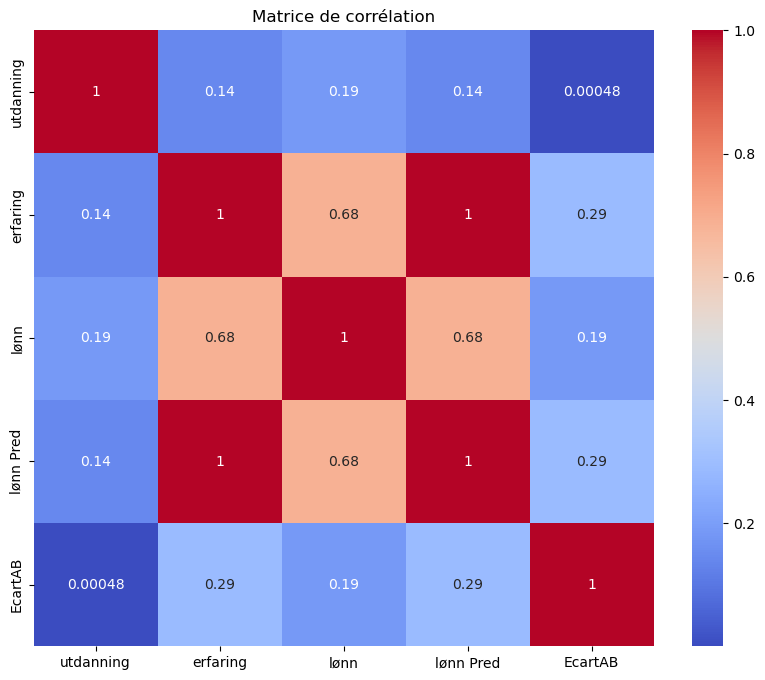

In [50]:
plt.figure(figsize=(10, 8))
sns.heatmap(dfWithoutError.corr(), annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

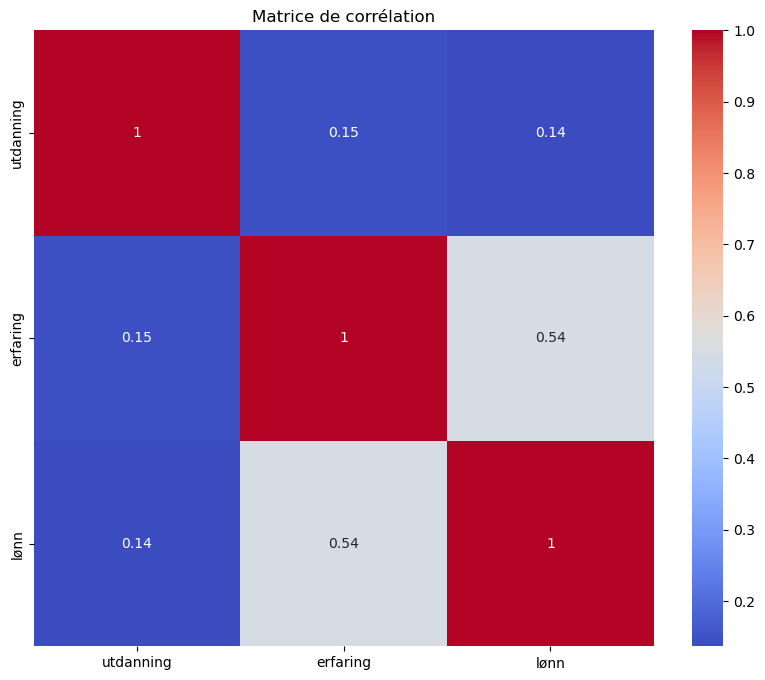

In [51]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

In [52]:
new_data = np.array([45, 46 ,47 , 50, 53, 54, 60])
print(new_data)
new_predictions = Prediction(new_data)
print("\nPrédictions pour de salaires en fonction du temps d'experience :")
for i, pred in enumerate(new_predictions):
    print(f"{new_data[i]} -> Prédiction : {pred}")

[45 46 47 50 53 54 60]

Prédictions pour de salaires en fonction du temps d'experience :
45 -> Prédiction : 1607450.6741517936
46 -> Prédiction : 1627644.2491681464
47 -> Prédiction : 1647837.8241844992
50 -> Prédiction : 1708418.549233558
53 -> Prédiction : 1768999.2742826166
54 -> Prédiction : 1789192.8492989694
60 -> Prédiction : 1910354.2993970865
